<a href="https://colab.research.google.com/github/sanmaopep/BankMarketing/blob/master/Machine_Learning_Homwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 机器学习作业


## 加载数据集

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
!ls "/content/gdrive/My Drive/Colab Notebooks/bankdata"
DataHome = "/content/gdrive/My Drive/Colab Notebooks/bankdata/"

bank-additional.csv	  bank-additional-names.txt  bank-full.csv
bank-additional-full.csv  bank.csv		     bank-names.txt


数据集来源：
- http://archive.ics.uci.edu/ml/datasets/Bank+Marketing

数据集来源于Portuguese银行电话销售记录，目标预测客户是否会购买定期存款服务（y变量）

对几个数据集的说明：
- bank-additional-full.csv 所有记录包括20个属性，日期排序的数据集
- bank-full.csv 较老的版本，17个属性
- bank-additional.csv 和 bank.csv 包含随机抽样的10%的样本，用于测试需要较高计算消耗的算法（SVM）


In [0]:
import pandas as pd

df=pd.read_csv(DataHome+'bank-additional-full.csv',sep=';')
df.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


In [0]:
print '各个字段的含义：'
!cat "/content/gdrive/My Drive/Colab Notebooks/bankdata/bank-additional-names.txt"

各个字段的含义：
﻿Citation Request:
  This dataset is publicly available for research. The details are described in [Moro et al., 2014]. 
  Please include this citation if you plan to use this database:

  [Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, In press, http://dx.doi.org/10.1016/j.dss.2014.03.001

  Available at: [pdf] http://dx.doi.org/10.1016/j.dss.2014.03.001
                [bib] http://www3.dsi.uminho.pt/pcortez/bib/2014-dss.txt

1. Title: Bank Marketing (with social/economic context)

2. Sources
   Created by: Sérgio Moro (ISCTE-IUL), Paulo Cortez (Univ. Minho) and Paulo Rita (ISCTE-IUL) @ 2014
   
3. Past Usage:

  The full dataset (bank-additional-full.csv) was described and analyzed in:

  S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems (2014), doi:10.1016/j.dss.2014.03.001.
 
4. Relevant Information:

## 数据预处理

### 数据分析

正负样本比例
YES 4640 NO 36548


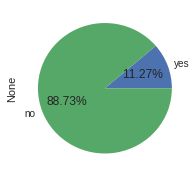

In [0]:
import matplotlib.pyplot as plt
from pandas import Series

print '正负样本比例'
yesCount = df.groupby('y').count()['age']['yes']
noCount = df.groupby('y').count()['age']['no']
print 'YES', yesCount, 'NO', noCount

plt.figure()
Series([yesCount, noCount],index=['yes','no']).plot.pie(autopct = '%1.2f%%',figsize=(3, 3))

样本不平衡可能会对训练造成一定的影响

In [0]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


由上信息可以看出，数值型变量没有缺失，非数值型变量可能存在unknown值，因此查看unknown值的个数


In [0]:
for col in df.columns:
  if type(df[col][0]) is str:
    print("unknown value count in " + col + " is " + str(df[df[col]=='unknown']['y'].count()))

unknown value count in job is 330
unknown value count in marital is 80
unknown value count in education is 1731
unknown value count in default is 8597
unknown value count in housing is 990
unknown value count in loan is 990
unknown value count in contact is 0
unknown value count in month is 0
unknown value count in day_of_week is 0
unknown value count in poutcome is 0
unknown value count in y is 0


### 缺失值处理

分析缺失数据的各个类别的分布

In [0]:
print('#########job distribution#########')
print df.job.value_counts()

print('\n#########marital distribution#########')
print df.marital.value_counts()

print('\n#########education distribution#########')
print df.education.value_counts()

print('\n#########default distribution#########')
print df.default.value_counts()

print('\n#########housing distribution#########')
print df.housing.value_counts()

print('\n#########loan distribution#########')
print df.loan.value_counts()

#########job distribution#########
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

#########marital distribution#########
married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64

#########education distribution#########
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

#########default distribution#########
no         32588
unknown     8597
yes            3
Name: default, dtype: int64

#########housing distribution#########
yes        21576
no         18622
unknown      990
Name: housi

我们将占比最高的类别作为unknown的类别。
其中housing中yes和no的比例比较接近，因此在缺失值填充上采取随机选择策略

In [0]:
import random

df.loc[df["job"] == "unknown", "job"] = "admin."
df.loc[df["marital"] == "unknown", "marital"] = "married"
df.loc[df["education"] == "unknown", "education"] = "university.degree"
df.loc[df["housing"] == "unknown", "housing"] = random.choice(["yes", "no"])
df.loc[df["loan"] == "unknown", "loan"] = "no"

default 只有 3个yes，因此丢弃这个属性

In [0]:
df = df.drop(["default"], axis = 1)

### 数据编码

二分类变量：housing和loan

可以直接编码为0和1

In [0]:
for col in df.columns:
  if type(df[col][0]) is str:
    df.loc[df[col] == "no", col] = 0
    df.loc[df[col] == "yes", col] = 1

有序类别变量：education, month, day_of_week

按照顺序从小到大编码

In [0]:
df.education = df.education.replace({"illiterate" : 1, "basic.4y" : 2, "basic.6y" : 3, "basic.9y" : 4, 
                                     "high.school" : 5, "professional.course" : 6, "university.degree" : 7})
df.month = df.month.replace({"jan" : 1, "feb" : 2, "mar" : 3, "apr" : 4, "may" : 5, "jun" : 6, 
                             "jul" : 7, "aug" : 8,"sep" : 9, "oct" : 10, "nov" : 11, "dec" : 12 })
df.day_of_week = df.day_of_week.replace({"mon" : 1, "tue" : 2, "wed" : 3, "thu" : 4, "fri" : 5 })

无序类别变量：job,  contact, poutcome, marital （剩下没处理的category数据都是）

直接使用pandas的get_dummies进行生成哑数据

In [0]:
df = pd.get_dummies(df)

计算各个属性和y的相关系数

In [0]:
corr = abs(df.corr())
corr.sort_values(["y"], ascending = False, inplace = True)
print corr.y
df.head()

y                       1.000000
duration                0.405274
nr.employed             0.354678
pdays                   0.324914
poutcome_success        0.316269
euribor3m               0.307771
emp.var.rate            0.298334
previous                0.230181
poutcome_nonexistent    0.193507
contact_telephone       0.144773
contact_cellular        0.144773
cons.price.idx          0.136211
job_student             0.093955
job_retired             0.092221
job_blue-collar         0.074423
campaign                0.066357
education               0.055175
cons.conf.idx           0.054878
marital_single          0.054133
marital_married         0.042966
month                   0.037187
job_services            0.032301
poutcome_failure        0.031799
job_admin.              0.031077
age                     0.030399
job_entrepreneur        0.016644
job_unemployed          0.014752
housing                 0.011085
marital_divorced        0.010608
day_of_week             0.010051
job_housem

,age,education,housing,loan,month,day_of_week,duration,campaign,pdays,previous,...,job_technician,job_unemployed,marital_divorced,marital_married,marital_single,contact_cellular,contact_telephone,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,2,0,0,5,1,261,1,999,0,...,0,0,0,1,0,0,1,0,1,0
1,57,5,0,0,5,1,149,1,999,0,...,0,0,0,1,0,0,1,0,1,0
2,37,5,1,0,5,1,226,1,999,0,...,0,0,0,1,0,0,1,0,1,0
3,40,3,0,0,5,1,151,1,999,0,...,0,0,0,1,0,0,1,0,1,0
4,56,5,0,1,5,1,307,1,999,0,...,0,0,0,1,0,0,1,0,1,0


生成X和Y供后面使用

In [0]:
X = df.drop(["y"], axis = 1)
Y = df.y

## 算法评估方法

导入相关的库

In [0]:
import numpy as np
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc
from sklearn.model_selection import cross_val_score, learning_curve, validation_curve, train_test_split
from sklearn.metrics import confusion_matrix

使用ShuffleSplit 进行 5-fold 5次交叉验证

In [0]:
from sklearn.model_selection import ShuffleSplit

cv = ShuffleSplit(n_splits = 5, test_size = 0.2)

分析混淆矩阵

In [0]:
def getConfusionMatrix(model):
  # Plotting the confusion matrix
  X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25)
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  confmat = confusion_matrix(y_test, y_pred)

  fig, ax = plt.subplots(figsize = (2.5, 2.5))
  ax.matshow(confmat, cmap = plt.cm.Blues, alpha = 0.5)
  for i in range(confmat.shape[0]) :
      for j in range(confmat.shape[1]) : 
          ax.text(x = j, y = i, s = confmat[i, j], va = "center", ha = "center")
  plt.xlabel("Predicted label")
  plt.ylabel("True label")
  plt.show()

绘制PR曲线, ROC曲线并计算AUC

In [0]:
# 需要model增加 probability=True
def getCurves(model):
  X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25)
  model.fit(X_train, y_train)
  y_pred = model.predict_proba(X_test)
  y_pred = np.transpose(y_pred)[1]
  precision, recall, thresholds = precision_recall_curve(y_test,y_pred )

  plt.plot(recall, precision)
  plt.title("PR curve")
  plt.xlabel("recall")
  plt.ylabel("precision")
  plt.show()
  
  fpr, tpr, thresholds = roc_curve(y_test, y_pred)
  
  plt.plot(fpr, tpr)
  plt.title("ROC curve")
  plt.xlabel("false postive")
  plt.ylabel("true postive")
  plt.show()
  
  print "AUC is ", auc(fpr, tpr)

其它一些算法中常用参数

In [0]:
n_jobs = 4 # 并行job数
train_sizes = np.linspace(start = 0.1, stop = 1.0, num = 10) # 用于分析训练样本数对模型准确率的影响

其它一些常用的函数

In [0]:
# 测试训练误差和测试误差随着x变化曲线
def plotMeansCurve(xrange, train_means, test_means, title):
  plt.plot(xrange, train_means, color = "blue", marker = "o", markersize = 5, label = "training accuracy")
  plt.plot(xrange, test_means, color = "green", linestyle = "--", marker = "s", markersize = 5, label = "validation accuracy")
  plt.xlabel(title)
  plt.ylabel("Accuracy")
  plt.legend(loc = "lower right")
  plt.ylim()
  plt.show()
  
 # 分析参数对准确率的影响
def analyzeParam(model, param_name, param_range):
  train_scores, test_scores = validation_curve(estimator = model, 
                                               X = X, 
                                               y = Y,
                                               param_name = param_name, 
                                               param_range = param_range,
                                               cv = cv,
                                               n_jobs = 4)
  train_means = np.mean(train_scores, axis = 1)
  test_means = np.mean(test_scores, axis = 1)
  plotMeansCurve(param_range, train_means, test_means, "Accuracy with " + param_name)
  print "Accuracy with " + param_name + " is ", test_means
  list = test_means.tolist()
  best = param_range[list.index(max(list))]
  print "best " + param_name + " is ", best
  return best

# 分析训练尺寸对准确率的影响
def analyzeTrainSize(model):
  actual_train_sizes, train_scores, test_scores = learning_curve(estimator = model, 
                                                        X = X, 
                                                        y = Y,
                                                        train_sizes = train_sizes, 
                                                        cv = cv,
                                                        n_jobs = n_jobs)
  train_means = np.mean(train_scores, axis = 1)
  test_means = np.mean(test_scores, axis = 1)
  plotMeansCurve(actual_train_sizes,train_means,test_means,"Number of training samples")
  print("Accuracy with full training : " + str(test_means[9]))
  

## 算法一 Logistic Regression

导入相关的库

In [0]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

调参分析：

参数C, 正则化系数λ的倒数，float类型，默认为1.0


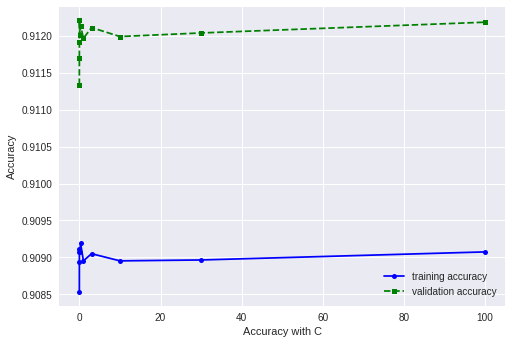

Accuracy with C is  [0.9113377  0.91170187 0.91192037 0.9122117  0.91201748 0.91213887
 0.91196892 0.91211459 0.9119932  0.91204176 0.91218742]
best C is  0.03


In [0]:
bestC = analyzeParam(lr, "C", [0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100])

可以看到正则化向对模型的影响并不是很大，直接采用1就可以

分析准确率随训练集大小的变化

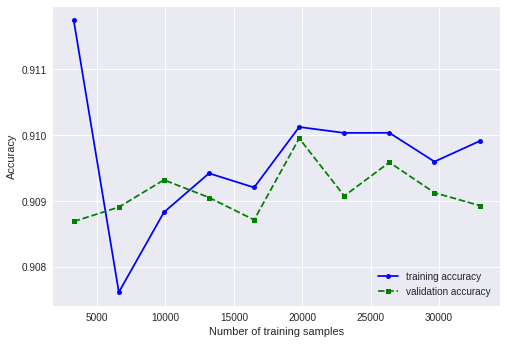

Accuracy with full training : 0.9089342073318767


In [0]:
lr = LogisticRegression(C=bestC)

analyzeTrainSize(lr)

获得混淆矩阵

/usr/local/lib/python2.7/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


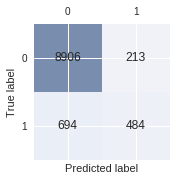

In [0]:
getConfusionMatrix(lr)

获取PR曲线，ROC曲线并计算AUC

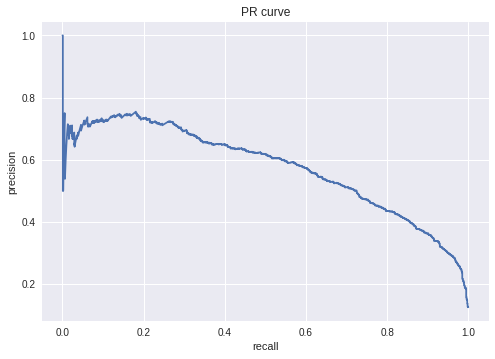

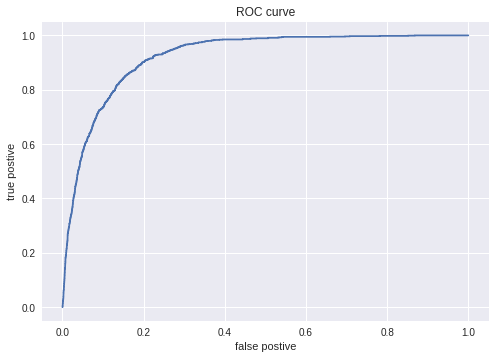

AUC is  0.922698596735373


In [0]:
getCurves(lr)

## 算法二 决策树

In [0]:
from sklearn import tree

dtree = tree.DecisionTreeClassifier(criterion='gini')

调参分析

max_depth 树的最大高度

min_samples_split 分裂所需的最小数量的节点数

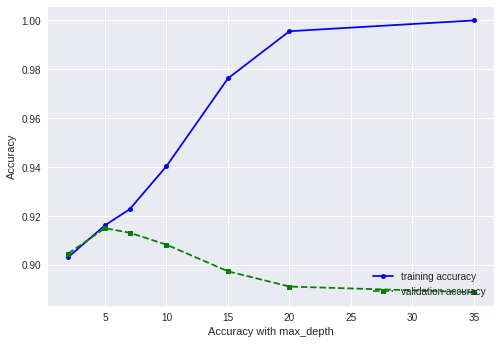

Accuracy with max_depth is  [0.9046856  0.91510075 0.91323137 0.90835154 0.89747512 0.89123574
 0.88892935]
best max_depth is  5


In [0]:
bestDepth = analyzeParam(dtree, "max_depth", [2, 5, 7, 10, 15, 20, 35])

最大深度提高，经验误差降低，但是泛化误差，说明树的高度过高容易造成过拟合

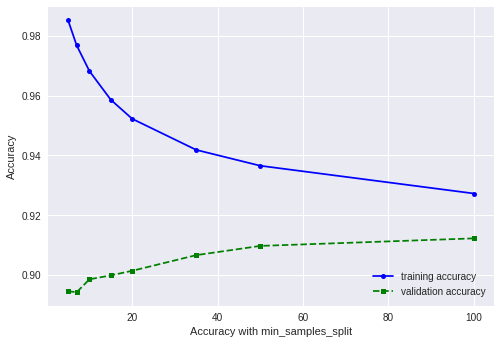

Accuracy with min_samples_split is  [0.89453751 0.8942219  0.89854334 0.89985433 0.90138383 0.90662782
 0.90971109 0.91223598]
best min_samples_split is  100


In [0]:
bestSamplesSplit = analyzeParam(dtree, "min_samples_split", [5, 7, 10, 15, 20, 35, 50, 100])

分析训练样本数对训练准确率的影响

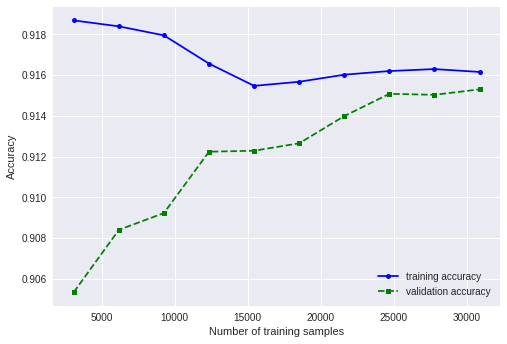

Accuracy with full training : 0.9152949745083758


In [0]:
dtree = tree.DecisionTreeClassifier(criterion='gini', max_depth=bestDepth, min_samples_split=bestSamplesSplit)

analyzeTrainSize(dtree)

获得混淆矩阵，PR曲线，ROC曲线

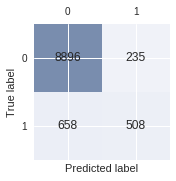

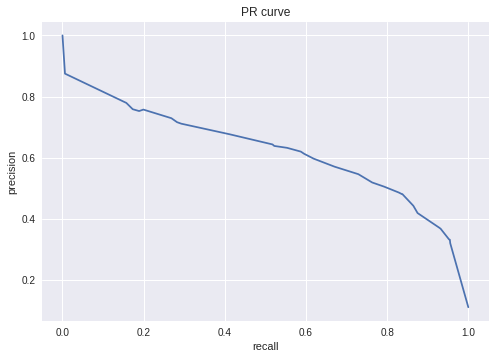

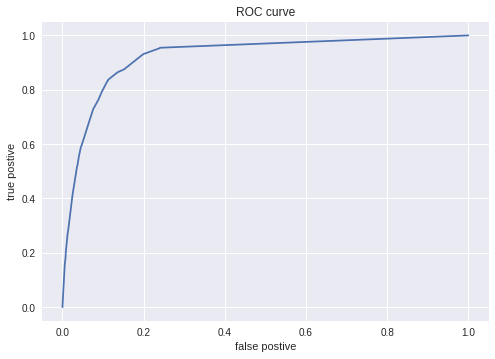

AUC is  0.9230422082560725


In [0]:
getConfusionMatrix(dtree)
getCurves(dtree)

画出这棵决策树

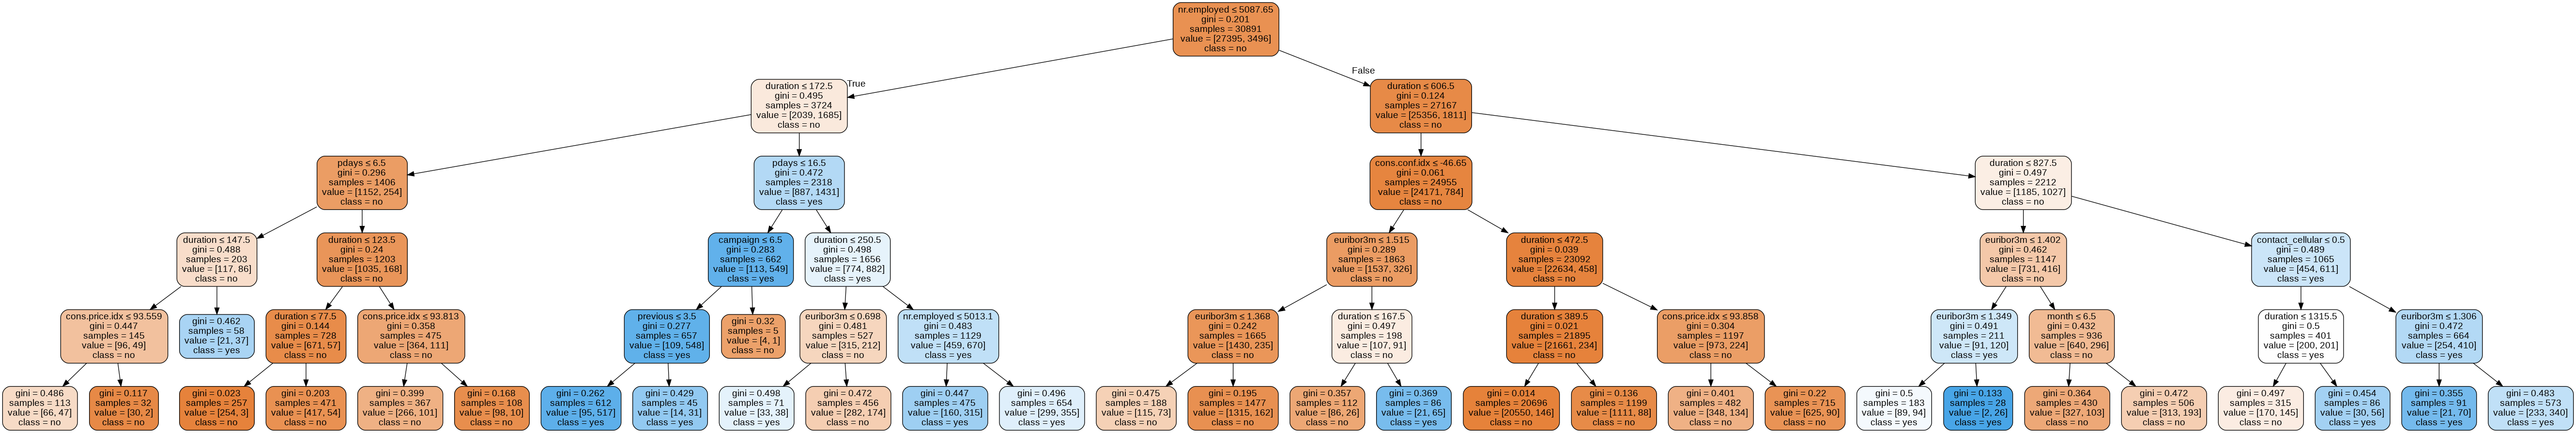

In [0]:
from IPython.display import Image  
import pydotplus 

dot_data = tree.export_graphviz(dtree, out_file=None, 
                         feature_names=X.columns,  
                         class_names=['no','yes'],  
                         filled=True, rounded=True,
                         special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png()) 

## 算法三 随机森林

In [0]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(criterion='gini')

我们需要找到一个让模型较好收敛的树的个数

n_estimators 森林树的数量

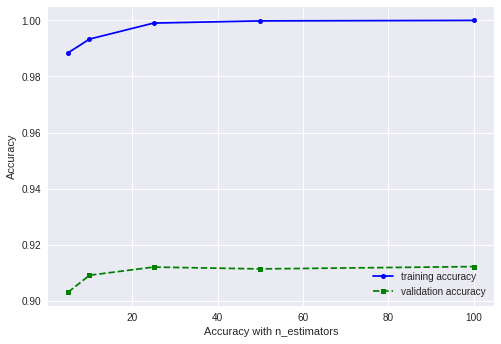

Accuracy with n_estimators is  [0.90310755 0.90915271 0.91206604 0.91141054 0.91223598]
best n_estimators is  100


100

In [0]:
analyzeParam(rf, "n_estimators", [5, 10, 25, 50, 100])

可以看到树的数量达到25的时候基本达到收敛

分析max_depth调参

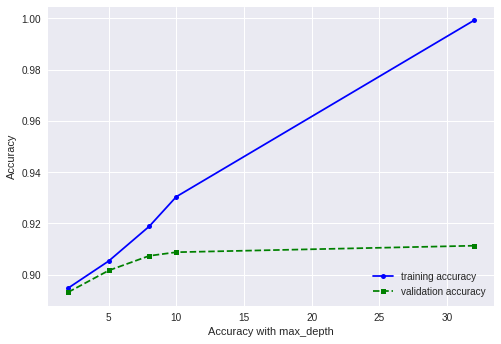

Accuracy with max_depth is  [0.89315368 0.90162661 0.90735615 0.90876426 0.91128915]
best max_depth is  32


32

In [0]:
rf = RandomForestClassifier(criterion='gini', n_estimators=25)
analyzeParam(rf, "max_depth", [2, 5, 6, 8, 32])

可以看到，树的最高高度在达到10的时候就基本收敛了,这和决策树中最大树高越高越容易过拟合有所区别

分析训练集大小对准确率的影响

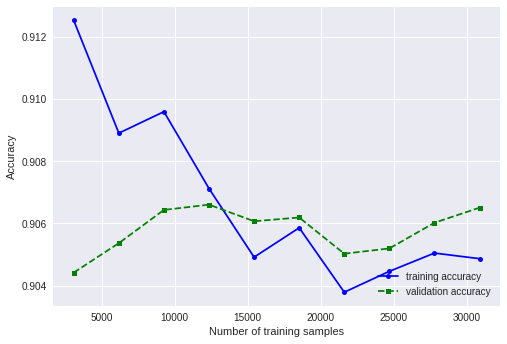

Accuracy with full training : 0.9065064336003884


In [0]:
rf = RandomForestClassifier(criterion='gini', n_estimators=25, max_depth=10)

analyzeTrainSize(rf)

分析混淆矩阵、PR曲线、ROC曲线

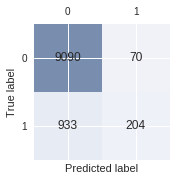

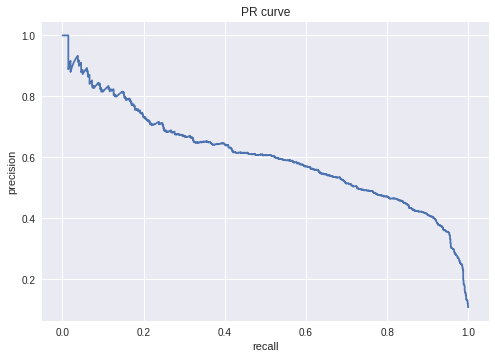

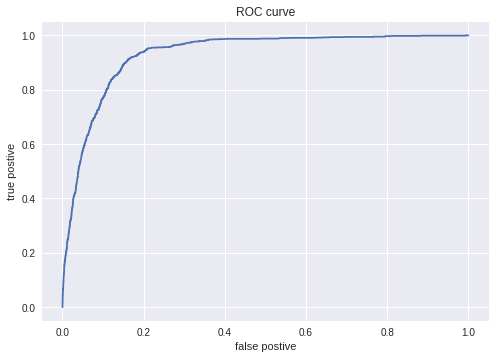

AUC is  0.9298867019295005


In [0]:
getConfusionMatrix(rf)
getCurves(rf)

从混淆矩阵看来，这里采用随机森林并没有比决策树有更好的表现。虽然准确率总体上看来有一点点提高，但是实际上大部分少实例类别实例被分到了多实例类别之中。